In [1]:
import sys
import random
sys.path.append("../")
sys.path.append("../../")
from pprint import pprint
from Core.maze import Maze, INF

import numpy as np

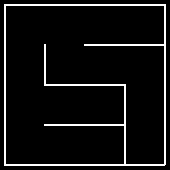

In [2]:
maze = Maze()
N = 4
maze.load(f"BinaryTree_{N}x{N}.maze")
display(maze.draw(cell_width=40))

# Q Learning
add some basic intro 

In [3]:
LEARNING_RATE = 0.1
DISCOUNT = 0.90

## Reward
on reaching the end, we give the agent 0 reward, else, its -1 for every timestep

In [30]:
def state_to_cell(state):
    """
    input:
        state:
            the mapping to the linearised q-table index
    return:
        cell:
            tuple of indices
    """
    if not (0 <= state < N*N):
        return None
    quotient = state//maze.num_rows
    remainder = state - quotient * maze.num_rows
    return (quotient, remainder)

In [33]:
def cell_to_state(cell):
    """
    input:
        cell:
            tuple of indices
    return:
        state:
            the mapping to the linearised q-table index
    """
    if not (0 <= cell[0] < maze.num_rows and 0 <= cell[1] < maze.num_columns):
        return None
    return cell[0]*maze.num_rows + cell[1]

In [34]:
def reward_cell(cell):
    """
    takes input as current cell.

    returns 0 if cell is the end state, else -1
    """

    if cell[0] == maze.num_rows - 1 and cell[1] == maze.num_columns - 1:
        return 0
    else:
        return -1


In [35]:
def reward(state):
    """
    takes input as current state.
    uses reward(cell)
    returns 0 if cell is the end state, else -1
    """
    return reward_cell(state_to_cell(state))

In [36]:
def get_next_cell(current_cell, action):
    """
    TODO: RESTRICT THE ACTION SPACE TO ACCESS ONLY THE NON-INF EDGES
    input:
        current_state:
            the current tuple of indices in the grid
        action:
            any of [0, 1, 2, 3] 
            taking the directions N, S, W, E respectively

    returns:
        valid action: the index tuple of the next state
        invalid action: None
    """

    if not (0 <= action < 4):
        raise ValueError(f"Invalid action {action}. Must be in [0, 3] range.")
    
    x, y = current_cell
    
    if not (0 <= x < maze.num_rows):
        # raise ValueError(f"Current state {x} out of row range {maze.num_rows}")
        return None
    if not (0 <= y < maze.num_columns):
        # raise ValueError(f"Current state {x} out of row range {maze.num_columns}")
        return None
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    dx, dy = directions[action]

    if not (0 <= x+dx < maze.num_rows):
        # raise ValueError(f"Current state {x} out of row range {maze.num_rows}")
        return None
    if not (0 <= y+dy < maze.num_columns):
        # raise ValueError(f"Current state {x} out of row range {maze.num_columns}")
        return None

    return (x+dx, y+dy)


In [37]:
def get_next_state(state, action):
    """
    Uses the get_next_cell function. Easie to use due to the helper functions.
    input:
        state: 
            current state
        action:
            current action
    return:
        future state
    """
    start_cell = state_to_cell(state)
    end_cell = get_next_cell(start_cell, action)
    try:
        return cell_to_state(end_cell)
    except:
        return None

In [38]:
get_next_state(0, 0)

In [39]:
# set of all actions that can be taken
# N, S, W, E
actions = [0, 1, 2, 3]

q table is desined such that where
```q[i][j]``` 

- i is the state
- j is the action that can be taken

if you do take the the jth action, using get_next_state(i, j) gives k, the new state
k = get_next_state(i, j)

In [40]:
def get_valid_actions(state):
    valid_actions = []
    for action in actions:
        if get_next_state(state, action):
            valid_actions.append(action)
    return valid_actions

In [64]:
# setup the q table
q_table = []

for i in range(maze.num_rows):
    for j in range(maze.num_columns):
        temp = []
        for value in maze.grid[i][j].neighbors.values():
            # the edges which are walls have value as -inf, 
            # to discourage any agent trying to go from there
            temp.append(-value)
        q_table.append(temp)

print(len(q_table))
print(q_table[0])
print(q_table[-1])

16
[-inf, 0, -inf, 0]
[0, -inf, -inf, -inf]


In [43]:
def Q(state, action):
    return q_table[state][action]

In [44]:
# iterate through all the states
for i in range(N*N):
    for j in actions:
        q_table[i][j] += LEARNING_RATE * (
            reward(i)
            + DISCOUNT * max([
                Q(get_next_state(i, action), action) for action in get_valid_actions(i) 
            ])
            - Q(i, j)
        )

In [66]:
print(N)
state = N*N-1
print(state)
print(get_valid_actions(state))
print(get_next_state(state, 0))
print(get_next_state(state, 2))
print(Q(11, 0))
print(Q(14, 2))
print(q_table[11])

4
15
[0, 2]
11
14
0
0
[0, 0, -inf, -inf]


In [68]:
[Q(get_next_state(N*N-1, action), action) for action in get_valid_actions(N*N-1)]

[0, 0]

In [49]:
# traverse time
while state != 

[-0.21825298639000001, nan, nan, -0.21825298639000001]
[nan, -0.29701, nan, -0.29701]
